     hyper_keys          hyper_item
0             K                1000
1             B                1024
2  split_method  bySample_bal_split
3             C                 1.0
4             E                   1
5            mu                   0


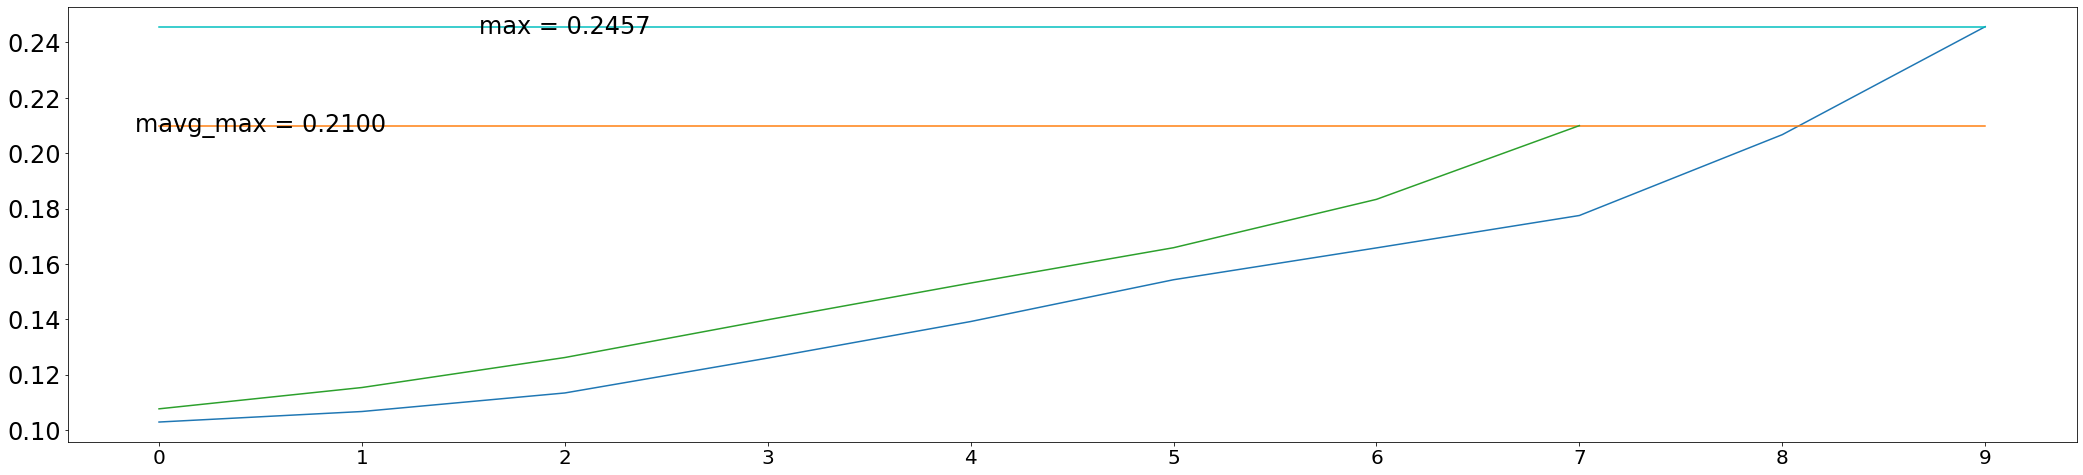

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import shutil




def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


directory = './data'
if os.path.exists(directory+'/.ipynb_checkpoints'):
    print('kill .ipynb_checkpoint')
    shutil.rmtree(directory+'/.ipynb_checkpoints')
    
def plt_acctest(path = max([os.path.join(directory,d) for d in os.listdir(directory)], key=os.path.getmtime) ):
    plt.figure(figsize=(36,8))
    df = pd.read_csv(path)
    df.columns[1:]
    
    print(df.loc[:5, df.columns[1:]])
    plt.plot(list(df.index), df['Gmodel acc'])
    ax = [0, list(df.index)[-1]]
    a = np.max(df['Gmodel acc'].values)
    ay = [a,a]
    plt.plot(ax, ay, 'c')
    plt.text( 2, a, 'max = '+str(format(a, '.4f')), horizontalalignment='center',
          verticalalignment='center', fontsize = 24)

        
    w = 3 # windows size
    mavg = moving_average(df['Gmodel acc'], w)
    a = np.max(mavg)
    ay = [a,a]
    plt.plot(ax, ay)
    plt.plot(list(df.index)[:-(w-1)], mavg)
    plt.text( 0.5, a, 'mavg_max = '+str(format(a, '.4f')), horizontalalignment='center',
          verticalalignment='center', fontsize = 24)


        
    a = np.ceil(0.6*len(df))
#     plt.text( a,0.1, 'round = '+str(len(df)-1), horizontalalignment='center',
#           verticalalignment='center', fontsize = 30)
    plt.xticks(list(df.index), fontsize=20)
    plt.yticks(fontsize=24)
    plt.show()
    

plt_acctest()

## pivot table

In [2]:
import pandas as pd

In [221]:
grid_csv = pd.read_csv('grid_search/grid_search_20210826-001536.csv', index_col=False)
grid_csv.pop('Unnamed: 0')
grid_csv

,C,K,rounds,epochs,df_loc
0,1.0,12,10,1,./data/acc_test_20210825-221729.csv
1,1.0,12,10,3,./data/acc_test_20210825-221845.csv
2,1.0,12,10,7,./data/acc_test_20210825-222119.csv
3,1.0,50,10,1,./data/acc_test_20210825-222217.csv
4,1.0,50,10,3,./data/acc_test_20210825-222406.csv
5,1.0,50,10,7,./data/acc_test_20210825-222735.csv
6,1.0,100,10,1,./data/acc_test_20210825-222855.csv
7,1.0,100,10,3,./data/acc_test_20210825-223104.csv
8,1.0,100,10,7,./data/acc_test_20210825-223454.csv
9,1.0,1000,10,1,./data/acc_test_20210825-224353.csv


In [222]:
lis = []
for sample in range(len(grid_csv)):
    data = grid_csv.loc[sample,:]
    dic = data.to_dict()

    df = pd.read_csv(dic['df_loc'], index_col=False)
    _ = set(df.dropna()['hyper_keys'])-set(dic.keys())

    for i in _:
        dic[i] = df[df['hyper_keys'] == i]['hyper_item'].to_numpy()[0]

    dic['maxACC'] = format(max(df['Gmodel acc']), '.4f')


    a = max(moving_average(df['Gmodel acc'], 3))

    dic['MA_maxACC'] = format(a, '.4f')

    lis.append(dic)

df = pd.DataFrame(lis)
a = list(df.columns)
(lambda col_lis, col: a.append(a.pop(a.index(col))))(a,'df_loc')
df = df[a]
df.head(3)

,C,K,rounds,epochs,mu,E,B,split_method,maxACC,MA_maxACC,df_loc
0,1.0,12,10,1,0,1,1024,bySample_bal_split,0.5171,0.4916,./data/acc_test_20210825-221729.csv
1,1.0,12,10,3,0,3,1024,bySample_bal_split,0.5054,0.4758,./data/acc_test_20210825-221845.csv
2,1.0,12,10,7,0,7,1024,bySample_bal_split,0.5797,0.4486,./data/acc_test_20210825-222119.csv


In [243]:
a = df.loc[:, ['C','K','E', 'maxACC','MA_maxACC']]
a.dtypes.index
for i in a.dtypes.index:
    if a.dtypes[i] == 'object':
        a.loc[:,i] = a.loc[:,i].map(lambda x: float(x))

a = pd.pivot_table(a, values='MA_maxACC', index=['C', 'E','maxACC'],
                    columns=['K'])
a

K                 12      50      100     1000
C   E   maxACC                                
0.1 1.0 0.1777     NaN     NaN     NaN  0.1684
        0.1784     NaN     NaN  0.1683     NaN
        0.1816  0.1501     NaN     NaN     NaN
        0.2344     NaN  0.1959     NaN     NaN
    3.0 0.2222     NaN  0.1433     NaN     NaN
        0.2288  0.2015     NaN     NaN     NaN
        0.3185     NaN     NaN  0.2911     NaN
        0.3343     NaN     NaN     NaN  0.3087
    7.0 0.1860  0.1670     NaN     NaN     NaN
        0.2087     NaN     NaN  0.1716     NaN
        0.2148     NaN  0.1752     NaN     NaN
        0.2797     NaN     NaN     NaN  0.2483
0.5 1.0 0.2190     NaN     NaN  0.2091     NaN
        0.2290     NaN     NaN     NaN  0.2160
        0.2872  0.2374     NaN     NaN     NaN
        0.3039     NaN  0.2929     NaN     NaN
    3.0 0.2556     NaN     NaN  0.2324     NaN
        0.2772     NaN  0.2089     NaN     NaN
        0.3798     NaN     NaN     NaN  0.3114
        0.4128  0.3848     NaN     NaN     NaN
    7.0 0.2521     NaN     NaN  0.2110     NaN
        0.2847     NaN     NaN     NaN  0.2507
        0.3150  0.3034     NaN     NaN     NaN
        0.3335     NaN  0.2595     NaN     NaN
1.0 1.0 0.2457     NaN     NaN     NaN  0.2100
        0.2635     NaN     NaN  0.2292     NaN
        0.3382     NaN  0.3203     NaN     NaN
        0.5171  0.4916     NaN     NaN     NaN
    3.0 0.2555     NaN     NaN     NaN  0.2115
        0.2575     NaN     NaN  0.2396     NaN
        0.4407     NaN  0.4239     NaN     NaN
        0.5054  0.4758     NaN     NaN     NaN
    7.0 0.3019     NaN     NaN  0.2717     NaN
        0.3409     NaN  0.2865     NaN     NaN
        0.3729     NaN     NaN     NaN  0.3497
        0.5797  0.4486     NaN     NaN     NaN

In [ ]:
z